
Processing n = 3...

Processing n = 4...
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exceeded maximum node expansions. Aborting this run.
A* search exc

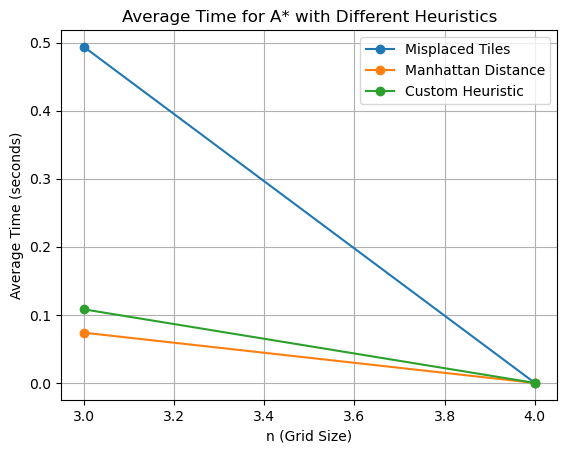

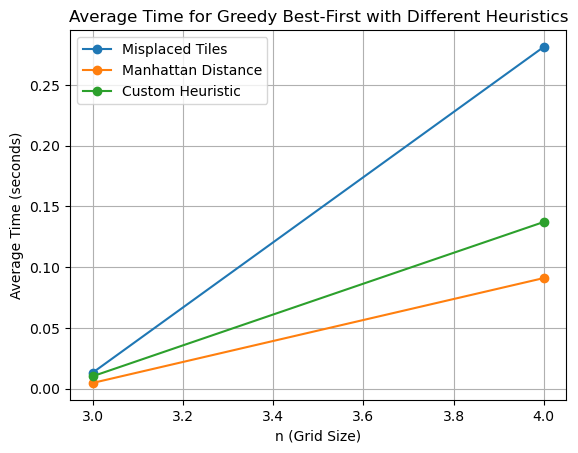

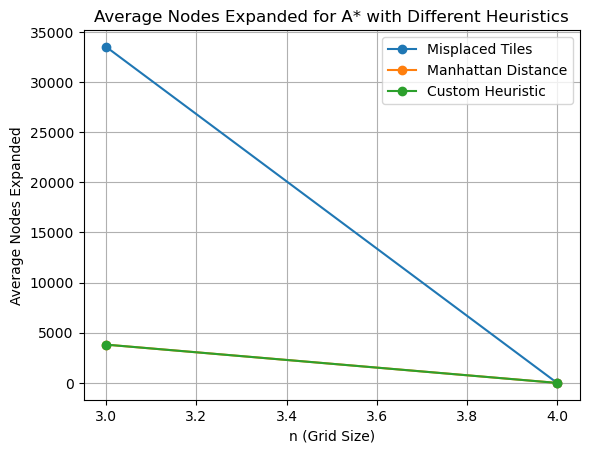

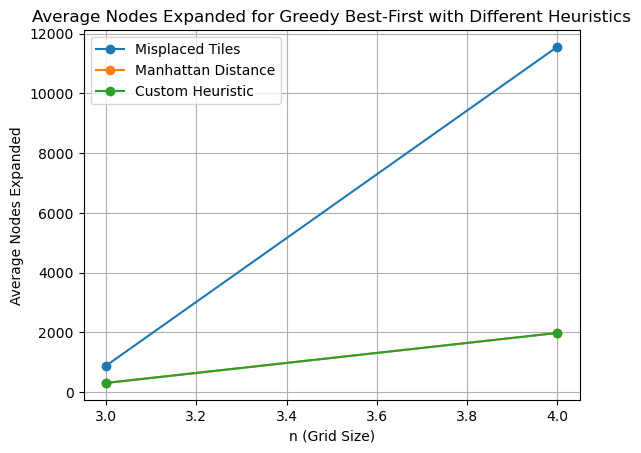

In [8]:
import time
import random
import heapq
import matplotlib.pyplot as plt

def generate_solvable_state(n):
    while True:
        state = list(range(n * n))
        random.shuffle(state)
        if is_solvable(state, n):
            return tuple(state)

def is_solvable(state, n):
    inversion_count = 0
    state_list = [x for x in state if x != 0]
    for i in range(len(state_list)):
        for j in range(i + 1, len(state_list)):
            if state_list[i] > state_list[j]:
                inversion_count += 1
    blank_pos = state.index(0)
    row = blank_pos // n
    blank_row_from_bottom = n - 1 - row
    if n % 2 == 1:
        return inversion_count % 2 == 0
    else:
        return (inversion_count + blank_row_from_bottom) % 2 == 0

def misplaced_tiles_heuristic(state, goal, n):
    return sum(1 for i in range(n*n) if state[i] != goal[i] and state[i] != 0)

def manhattan_distance_heuristic(state, goal, n):
    distance = 0
    for i in range(n*n):
        if state[i] == 0:
            continue
        goal_pos = goal.index(state[i])
        current_row, current_col = divmod(i, n)
        goal_row, goal_col = divmod(goal_pos, n)
        distance += abs(current_row - goal_row) + abs(current_col - goal_col)
    return distance

def custom_heuristic(state, goal, n):
    h1 = misplaced_tiles_heuristic(state, goal, n)
    h2 = manhattan_distance_heuristic(state, goal, n)
    return max(h1, h2)

def a_star_search(start, goal, n, heuristic_func, timeout, max_steps=100000):
    start_time = time.time()
    goal_tuple = tuple(goal)
    start_tuple = tuple(start)
    open_heap = []
    initial_h = heuristic_func(start_tuple, goal_tuple, n)
    heapq.heappush(open_heap, (initial_h, 0, start_tuple))
    g_score = {start_tuple: 0}
    nodes_expanded = 0

    while open_heap:
        # Check if we have expanded too many nodes (max steps reached)
        if nodes_expanded >= max_steps:
            print("A* search exceeded maximum node expansions. Aborting this run.")
            return (None, nodes_expanded)
        # Check if time is up
        if time.time() - start_time > timeout:
            print("A* search timed out. Aborting this run.")
            return (None, nodes_expanded)

        current_f, current_g, current_state = heapq.heappop(open_heap)
        nodes_expanded += 1

        if current_state == goal_tuple:
            return (time.time() - start_time, nodes_expanded)

        blank_pos = current_state.index(0)
        row, col = divmod(blank_pos, n)

        moves = []
        if row > 0:
            moves.append(-n)
        if row < n - 1:
            moves.append(n)
        if col > 0:
            moves.append(-1)
        if col < n - 1:
            moves.append(1)

        for move in moves:
            new_pos = blank_pos + move
            new_state_list = list(current_state)
            new_state_list[blank_pos], new_state_list[new_pos] = new_state_list[new_pos], new_state_list[blank_pos]
            new_state = tuple(new_state_list)
            tentative_g = current_g + 1

            if new_state not in g_score or tentative_g < g_score.get(new_state, float('inf')):
                g_score[new_state] = tentative_g
                new_h = heuristic_func(new_state, goal_tuple, n)
                new_f = tentative_g + new_h
                heapq.heappush(open_heap, (new_f, tentative_g, new_state))

    return (None, nodes_expanded)

def greedy_best_first_search(start, goal, n, heuristic_func, timeout, max_steps=100000):
    start_time = time.time()
    goal_tuple = tuple(goal)
    start_tuple = tuple(start)
    open_heap = []
    initial_h = heuristic_func(start_tuple, goal_tuple, n)
    heapq.heappush(open_heap, (initial_h, start_tuple))
    visited = set()
    nodes_expanded = 0

    while open_heap:
        # Check maximum steps and timeout as above
        if nodes_expanded >= max_steps:
            print("Greedy Best-First search exceeded maximum node expansions. Aborting this run.")
            return (None, nodes_expanded)
        if time.time() - start_time > timeout:
            print("Greedy Best-First search timed out. Aborting this run.")
            return (None, nodes_expanded)

        current_h, current_state = heapq.heappop(open_heap)
        nodes_expanded += 1

        if current_state in visited:
            continue
        visited.add(current_state)

        if current_state == goal_tuple:
            return (time.time() - start_time, nodes_expanded)

        blank_pos = current_state.index(0)
        row, col = divmod(blank_pos, n)

        moves = []
        if row > 0:
            moves.append(-n)
        if row < n - 1:
            moves.append(n)
        if col > 0:
            moves.append(-1)
        if col < n - 1:
            moves.append(1)

        for move in moves:
            new_pos = blank_pos + move
            new_state_list = list(current_state)
            new_state_list[blank_pos], new_state_list[new_pos] = new_state_list[new_pos], new_state_list[blank_pos]
            new_state = tuple(new_state_list)
            if new_state not in visited:
                new_h = heuristic_func(new_state, goal_tuple, n)
                heapq.heappush(open_heap, (new_h, new_state))

    return (None, nodes_expanded)

def main():
    # You can experiment with different grid sizes.
    n_values = [3, 4]
    timeout = 60  # seconds allowed per run
    max_steps = 100000  # maximum nodes to expand per run
    num_initial_states = 10
    heuristics = {
        'Misplaced Tiles': misplaced_tiles_heuristic,
        'Manhattan Distance': manhattan_distance_heuristic,
        'Custom Heuristic': custom_heuristic
    }
    algorithms = {
        'A*': a_star_search,
        'Greedy Best-First': greedy_best_first_search
    }

    # Data structure to store results
    results = {
        n: {
            algo: {
                heuristic: {'time': [], 'nodes': []}
                for heuristic in heuristics
            }
            for algo in algorithms
        }
        for n in n_values
    }

    for n in n_values:
        print(f"\nProcessing n = {n}...")
        goal = list(range(1, n*n)) + [0]
        initial_states = [generate_solvable_state(n) for _ in range(num_initial_states)]

        for initial in initial_states:
            for algo_name, algo_func in algorithms.items():
                for heuristic_name, heuristic_func in heuristics.items():
                    # Pass both timeout and max_steps to the search functions
                    time_taken, nodes_expanded = algo_func(initial, goal, n, heuristic_func, timeout, max_steps)
                    if time_taken is not None:
                        results[n][algo_name][heuristic_name]['time'].append(time_taken)
                        results[n][algo_name][heuristic_name]['nodes'].append(nodes_expanded)

        # Calculate and store averages for this grid size
        for algo in algorithms:
            for heuristic in heuristics:
                time_list = results[n][algo][heuristic]['time']
                nodes_list = results[n][algo][heuristic]['nodes']
                avg_time = sum(time_list) / len(time_list) if time_list else 0
                avg_nodes = sum(nodes_list) / len(nodes_list) if nodes_list else 0
                results[n][algo][heuristic]['avg_time'] = avg_time
                results[n][algo][heuristic]['avg_nodes'] = avg_nodes

    # Plotting time comparison
    for algo in algorithms:
        plt.figure()
        for heuristic in heuristics:
            x = n_values
            y = [results[n][algo][heuristic]['avg_time'] for n in n_values]
            plt.plot(x, y, marker='o', label=heuristic)
        plt.xlabel('n (Grid Size)')
        plt.ylabel('Average Time (seconds)')
        plt.title(f'Average Time for {algo} with Different Heuristics')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Plotting nodes expanded comparison
    for algo in algorithms:
        plt.figure()
        for heuristic in heuristics:
            x = n_values
            y = [results[n][algo][heuristic]['avg_nodes'] for n in n_values]
            plt.plot(x, y, marker='o', label=heuristic)
        plt.xlabel('n (Grid Size)')
        plt.ylabel('Average Nodes Expanded')
        plt.title(f'Average Nodes Expanded for {algo} with Different Heuristics')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()
